<a href="https://colab.research.google.com/github/sakshia08/OrbTrack_AI/blob/main/orbtrack_ISSlocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install skyfield

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.0/367.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.5/234.5 kB 11.8 MB/s eta 0:00:00


In [3]:
from skyfield.api import load
# CelesTrek data
stations_url = 'https://celestrak.com/NORAD/elements/stations.txt'
satellites = load.tle_file(stations_url)


[#################################] 100% stations.txt


In [4]:
#ISS location
name_iss = {sat.name: sat for sat in satellites}
iss = name_iss['ISS (ZARYA)']
ts = load.timescale()
t = ts.now()

In [5]:
#ISS position at current time
geocentric = iss.at(t)
subpoint = geocentric.subpoint()
print(f"Latitude: {subpoint.latitude.degrees:.2f}")
print(f"Longitude: {subpoint.longitude.degrees:.2f}")
print(f"Elevation: {subpoint.elevation.km:.2f} km")

Latitude: -15.28
Longitude: -165.49
Elevation: 419.90 km


In [11]:
pip install skyfield matplotlib

In [12]:
import matplotlib.pyplot as plt

In [7]:
#next 90 minutes all at 1 minute intervals
ts = load.timescale()
times = ts.utc(2025, 6, 16, range(0, 91))

In [8]:
#pts at each time
latitudes = []
longitudes = []

for t in times:
    subpoint = iss.at(t).subpoint()
    latitudes.append(subpoint.latitude.degrees)
    longitudes.append(subpoint.longitude.degrees)

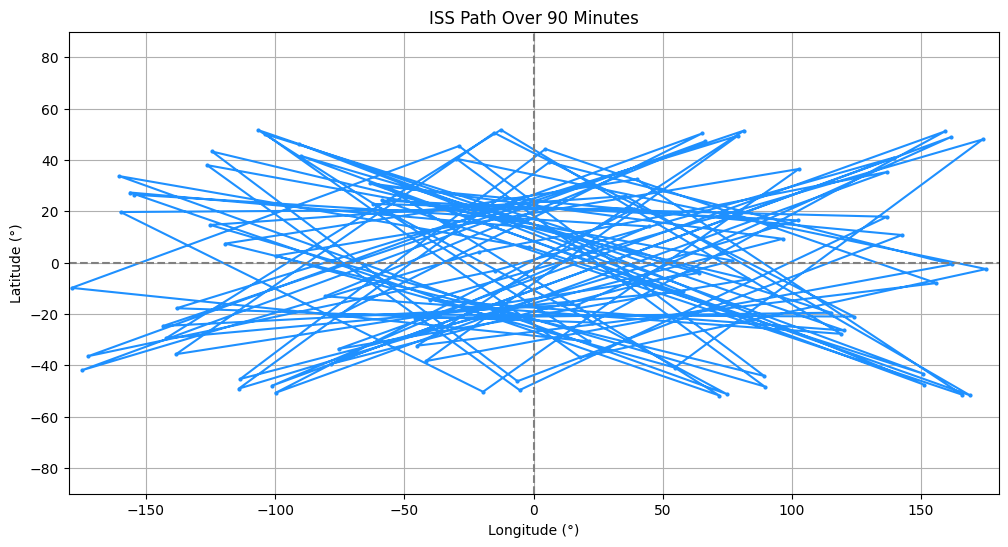

In [13]:
#path
plt.figure(figsize=(12, 6))
plt.title("ISS Path Over 90 Minutes")
plt.xlabel("Longitude (°)")
plt.ylabel("Latitude (°)")
plt.plot(longitudes, latitudes, marker='o', markersize=2, linestyle='-', color='dodgerblue')
plt.grid(True)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()